# A report on the relationship between salinity, temperature and depth in the ocean.

# Introduction

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) is a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. In this project we are using the dataset prepared by this organization which includes a lot of physical, chemical and biological data collected in different time intervals and different space in an ocean. Data of temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity are collected and stored in csv file.

I used this dataset from Kaggle : https://www.kaggle.com/datasets/sohier/calcofi
Since we have many different oceanographic data, in this project we are particularly interested in two features in an ocean viz. Temperature and Salinity. We are also interested in the relation between temperature and depth. Salinity is a measure of salt concentration in water. There are 864850 unique instances in the dataset. Since this is a fairly big enough dataset, we will try to answer some research questions.

# Objectives

To answer the following research questions:
1. Is it possible to predict salinity depending upon the water temperature in oceans ?
2. What kind of relationship exists between temperature and salinity (if any) ?
3. How does temperature change with depth in the ocean ?
4. Can we predict temperature in the ocean given the depth ?

# Methodology

I am approaching this problem by using data analysis techniques and applying regression models in python. Since we have to establish relation between two variables only in each research objective, regression techniques can help discover any relation between variables.

# Data Analysis

Let's proceed by loading the dataset.

## Data Loading

Importing important python libraries and loading the dataset with pandas read_csv(). <br>Original dimensions of the dataset : 864863 rows × 74 columns.<br>
Let’s start inspecting some aspects of the dataset.


In [2]:
import pandas as pd                   #module for working with higher dimensional arrays easily
import numpy as np                   # module for mathematical functions, random number generators
import matplotlib.pyplot as plt      # module for data visualization and plotting
import seaborn as sns                # module for data visualization

# following modules are for machine learning analysis
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [3]:
data = pd.read_csv("bottle.csv")      # reading the dataset 

C:\Users\Bishal\AppData\Local\Temp\ipykernel_484\3950199516.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("bottle.csv")      # reading the dataset


## Data Inspection and Manipulation

In [4]:
data.head()     #print first five rows of dataset

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()      # basic information on columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

There are 74 columns, i.e. 74 variables.<br> Since we are working with only three features here, data segregation was done.<br> ‘Depthm’ stores depth in the ocean in meters, ‘T_degC’ represents temperature in degrees celsius and ‘Salnty’ represents salinity in g of salt per kg of water (g/kg).

In [6]:
data = data[['Depthm', 'T_degC', 'Salnty']]    #taking subset of main dataset to include only three columns

In [7]:
data

,Depthm,T_degC,Salnty
0,0,10.500,33.4400
1,8,10.460,33.4400
2,10,10.460,33.4370
3,19,10.450,33.4200
4,20,10.450,33.4210
...,...,...,...
864858,0,18.744,33.4083
864859,2,18.744,33.4083
864860,5,18.692,33.4150
864861,10,18.161,33.4062


This is the data that we will proceed further with. Data was not clean i.e. there were some missing values.<br> To see all the rows containing missing values, we run the following command and proceed further.

## Data Cleaning

In [8]:
data[data.isna().any(axis = 1)]            #prints all rows if it has any null value

,Depthm,T_degC,Salnty
17,221,8.45,NaN
98,40,9.97,NaN
129,37,10.20,NaN
222,37,12.23,NaN
264,246,NaN,33.95
...,...,...,...
810515,10,14.88,NaN
810524,10,15.10,NaN
811305,10,15.27,NaN
828253,0,13.58,NaN


Seeing the percentage of data containing null values.


In [9]:
missing_percentage = data.isnull().sum()*100 / len(data)       # percentage of null values in each column
missing_df = pd.DataFrame({'Columns': data.columns, 'Missing Percentage': missing_percentage}) # put above data into a dataframe
missing_df

,Columns,Missing Percentage
Depthm,Depthm,0.000000
T_degC,T_degC,1.267600
Salnty,Salnty,5.475318


I was interested in the percentage of null values in each row because the dataset was big and the only metric to identify the volume of null values would be the percentage of null values for each variable.<br> Since the percentage of null values was 1.26% in the ‘T_degC’ column and 5.47% in the ‘Salnty’ column and 0% in the ‘Depthm’ column, I handled these missing values by replacing them with the median value in each column. 

In [10]:
data = data.fillna(data.median())       # replaces all null values with median value of the particular column

In [11]:
missing_percentage = data.isnull().sum()*100 / len(data)
missing_df = pd.DataFrame({ 'Missing Percentage': missing_percentage})
missing_df

,Missing Percentage
Depthm,0.0
T_degC,0.0
Salnty,0.0


Snippet above confirms that we replaced all the missing values.
<br><br>
Now, it’s time to start looking into the relation between variables. Let’s first look at the correlation between variables.
<br><br>
Scatterplot is a good way of visualizing relations between variables. 


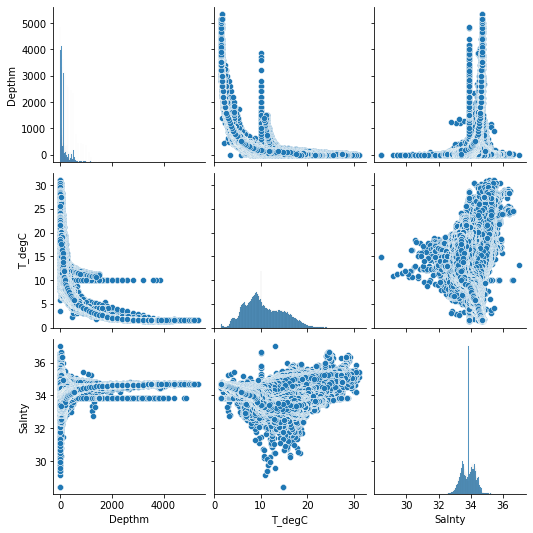

In [12]:
sns.pairplot(data)               # displays scatterplot for every possible pair of columns

Well, inspecting the above scatterplot, we can get some insights on how each variable behaves on increasing or decreasing the value of each other variable.<br> Let’s look at the scatterplot of ‘Depthm’ and ‘T_degC’, we see that they are related but not linearly.<br> We can say that there exists a polynomial relationship between depth and temperature in the ocean.<br> It gives us a reason to use nonlinear regression models in our analysis later on.<br> Similarly, temperature versus salinity looks very random, we will explore the underlying relationship later .


For now, let’s try to mathematically understand the graph we just saw .

In [13]:
data.corr()

,Depthm,T_degC,Salnty
Depthm,1.000000,-0.677582,0.544113
T_degC,-0.677582,1.000000,-0.490233
Salnty,0.544113,-0.490233,1.000000


<AxesSubplot:>

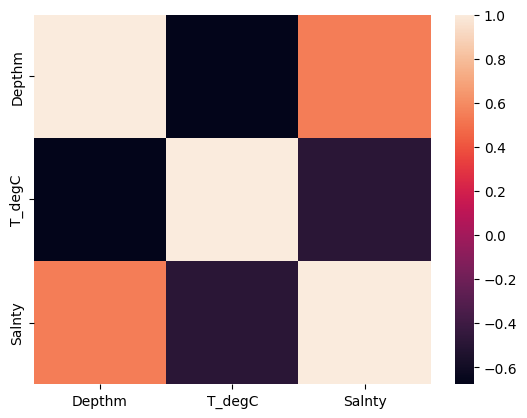

In [14]:
sns.heatmap(data.corr())     # displays heatmap of correlation

Looking at the heatmap and correlation values, we find that temperature and depth show fairly strong negative correlation (-0.67). <br>Similarly depth and salinity have correlation coefficient of 0.54 which shows fairly strong positive correlation.<br> Similarly correlation coefficient of -0.49 shows mild negative correlation between temperature and salinity.

In [15]:
# Scale the dataset using Standard Scaler 
std = StandardScaler()                       
scaled = std.fit_transform(data)
scaled_df = pd.DataFrame(scaled, columns = data.columns)

Now we need to scale the dataset to turn it into a standard distribution so that we can get a better regression line while fitting the regression model.<br> Above code snippet does that.
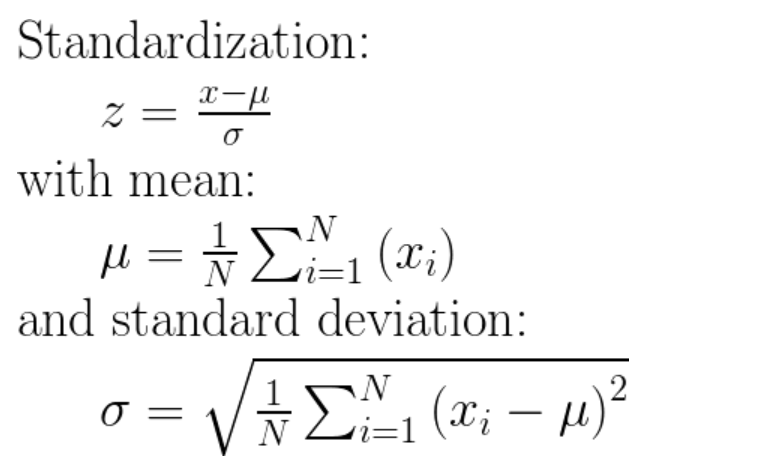

In [16]:
scaled_df

,Depthm,T_degC,Salnty
0,-0.717709,-0.068830,-0.894309
1,-0.692396,-0.078314,-0.894309
2,-0.686068,-0.078314,-0.900990
3,-0.657592,-0.080685,-0.938848
4,-0.654428,-0.080685,-0.936621
...,...,...,...
864858,-0.717709,1.885813,-0.964903
864859,-0.711381,1.885813,-0.964903
864860,-0.701889,1.873483,-0.949982
864861,-0.686068,1.747584,-0.969579


Let’s look at the heatmap and correlation matrix again, is there any improvement?


In [17]:
data.corr()

,Depthm,T_degC,Salnty
Depthm,1.000000,-0.677582,0.544113
T_degC,-0.677582,1.000000,-0.490233
Salnty,0.544113,-0.490233,1.000000


We won’t see improvement because StandardScaler only scales the same dataset into comparable scales.
<br><br>
Now we will separate the target variable and input variable. We want Temperature to be input variable for us to predict the target variable i.e. Salinity. Reshaping is needed so that we can easily fit regression models.


In [18]:
# seperate dependent and target variables as 'X' and 'Y'
X = scaled_df['T_degC'].to_numpy().reshape(-1,1)     
Y = scaled_df['Salnty'].to_numpy().reshape(-1,1)

Now we can use the scaled dataset to create a training and testing set.

In [19]:
#randomly seperates dataset into 70% training set and 30% testing set
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3)

Therefore, we can fit the LinearRegression model and analyze the results.


# Results and Findings

### Temperature and Salinity
<br> Implementing linear regression:

Score:0.23966102601555195 
Coefficient:[-0.49038649] 
Intercept:[-3.84990919e-05]


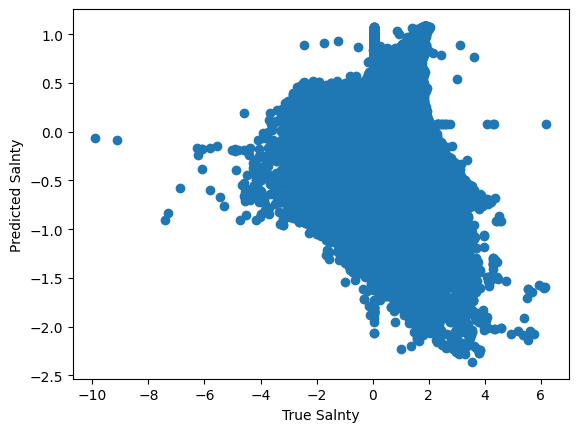

In [20]:
model = LinearRegression()      # creating the Linear Regression Model
  
model.fit(X_train,Y_train)      # fits training set to the model 
print(f'Score:{model.score(X_test, Y_test)} \nCoefficient:{model.coef_[0]} \nIntercept:{model.intercept_}')

Y_pred = model.predict(X_test)   # get predictions for testing set
plt.scatter(Y_test,Y_pred)       # plots predicted data vs actual data
plt.xlabel('True Salnty')
plt.ylabel('Predicted Salnty')

m = model.coef_[0]                # slope of fitting line
c = model.intercept_              # intercept of fitting line

Above implementation of linear regression seeks to predict salinity based on the temperature values. The model has an R squared score of 0.2398.<br> The graph between true value of salinity and predicted value of salinity can be observed and it shows the result is poor. <br>This model is a poor fit. Since we have got the coefficient and intercept value for the regression line, we can plot it.

In [221]:
x = scaled_df['T_degC']       
y = m*x + c             # get y-coordinates of the regression line using slope and intercept

Text(0.5, 0, 'Temperature in degree celcius')

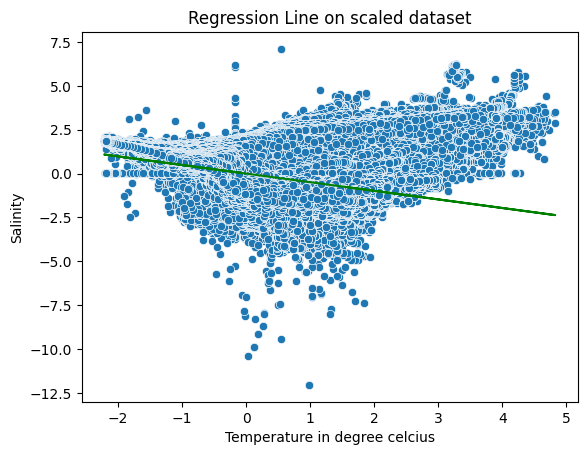

In [222]:
#visualize regression line of fit 
sns.scatterplot(x = 'T_degC', y = 'Salnty', data = scaled_df)
plt.plot(x, y, color = 'green')
plt.title('Regression Line on scaled dataset')
plt.ylabel('Salinity')
plt.xlabel('Temperature in degree celcius')

Also, we want to look at the other metric that is root mean squared error.

In [223]:
r2 = r2_score(Y_test, Y_pred)                               # get accurracy of the model
rmse = mean_squared_error(Y_test, Y_pred, squared = True)   # get root mean squared error
print(f'R2 Score: {r2} \nRMSE : {rmse}')                    # prints score and error

R2 Score: 0.23989473410464568 
RMSE : 0.7606037393911257


Above data is for the scaled dataset.
We got a better rmse value for the dataset which was not scaled as shown below:

In [227]:
X = data['T_degC'].to_numpy().reshape(-1,1)
Y = data['Salnty'].to_numpy().reshape(-1,1)

Score:0.23655720111415657 
Coefficient:[-0.05236094] 
Intercept:[34.4065459]


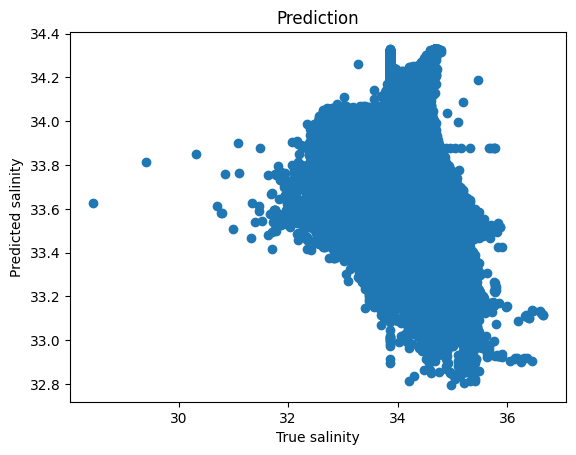

In [228]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3)
model = LinearRegression()

model.fit(X_train,Y_train)
print(f'Score:{model.score(X_test, Y_test)} \nCoefficient:{model.coef_[0]} \nIntercept:{model.intercept_}')
Y_pred = model.predict(X_test)
plt.scatter(Y_test,Y_pred)
plt.xlabel('True salinity')
plt.ylabel('Predicted salinity')
plt.title('Prediction')

m = model.coef_[0]
c = model.intercept_

R2 Score: 0.23655720111415657 
RMSE : 0.15442077033266072


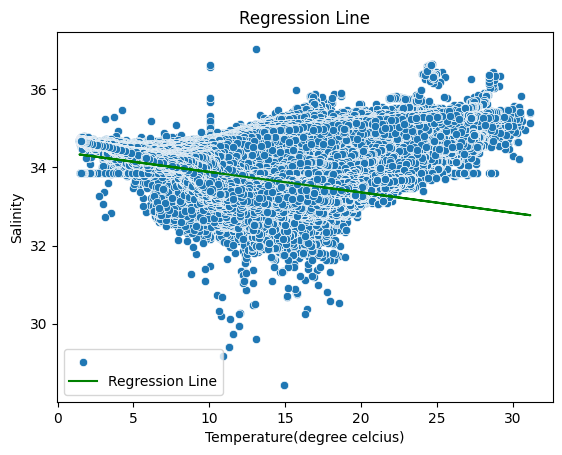

In [233]:
x = data['T_degC']
y = m*x + c

sns.scatterplot(x = 'T_degC', y = 'Salnty', data = data)
plt.plot(x, y, color = 'green')
plt.title('Regression Line')
plt.ylabel('Salinity')
plt.xlabel('Temperature(degree celcius)')
plt.legend(['', 'Regression Line'])

r2 = r2_score(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared = True)
print(f'R2 Score: {r2} \nRMSE : {rmse}')

#### RMSE from non scaled data shows that the standard deviation for prediction of salinity is only 0.15.


### Depth and Temperature

Text(0, 0.5, 'Temperature in degreeC')

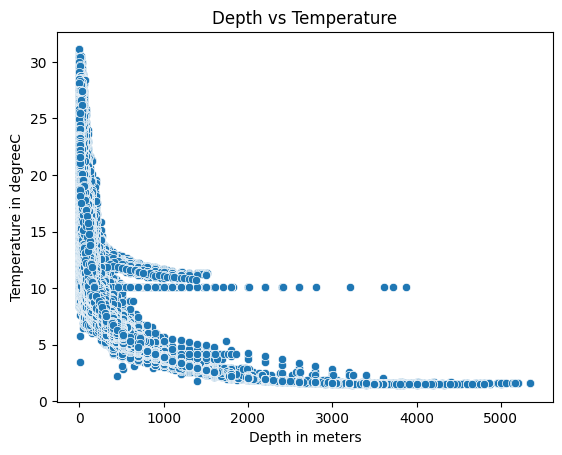

In [236]:
sns.scatterplot(y = data['T_degC'], x = data['Depthm'], data = data)
plt.title('Depth vs Temperature')
plt.xlabel('Depth in meters')
plt.ylabel('Temperature in degreeC')

Scatterplot between Depth and Temperature shows that there is no linear relation between them but there is a polynomial relationship. <br>It clearly shows temperature decreases with increasing depth in the ocean. Let’s use Decision Tree Regressor to create a model to predict temperatures based on depth.

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = data['Depthm'].to_numpy().reshape(-1,1)
Y = data['T_degC'].to_numpy().reshape(-1,1)

dtr = DecisionTreeRegressor()

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3)

dtr.fit(X_train,Y_train)

After fitting the Depth and Temperature data into decision tree regression models, we can now visualize how good the predictions this model can make.


Text(0, 0.5, 'Predicted Temperature')

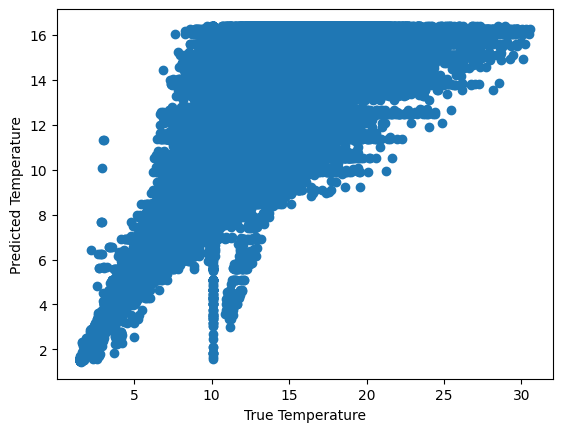

In [57]:
Y_pred = dtr.predict(X_test)
plt.scatter(Y_test,Y_pred)
plt.xlabel('True Temperature')
plt.ylabel('Predicted Temperature')

We see a pretty linear graph that means we might have got a good score too.<br> Let’s evaluate scores and error metrics for the model.

In [62]:
r2 = r2_score(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared = True)
print(f'R2 Score: {r2} \nRMSE : {rmse}')

R2 Score: 0.771862007099797 
RMSE : 4.066286864343186


This model got a score of 0.77 and RMSE value is 4.066.<br> It means the predicted temperatures are within ± 4 degrees.<br> That’s a pretty good model to predict the temperature in the ocean given the depth.

# Discussion and Conclusion

To conclude about any data project, we need to have a good understanding of the dataset, its collection procedures and the way it is analyzed. In the context of this project we must not forget that we had more than 70 variables out of which we selected and tried to establish some relation between salinity and temperature. The results show that there is not very strong correlation between temperature and salinity and the regression fit is also poor. The score of the regression is very less i.e. only 0.24. Though we got an insight from the analysis that there is negative correlation between temperature and salinity and also there is positive correlation between depth and salinity. To be able to predict Salinity we need to consider more variables.

In conclusion, the project is successful in answering the research questions. We can predict the salinity in the ocean given the temperature only with 23% accuracy . We can conclude that it is not possible to perfectly predict salinity from the temperature alone since there are a lot of other physical, biological and chemical factors affecting the salt levels in the ocean. But we can indeed conclude that there exists a negative correlation between salinity and temperature, i.e. with increasing temperature, salinity decreases and vice versa. Also in the case of depth and temperature, temperature decreases as depth increases in the ocean. We can predict the temperature in the ocean given the depth with 77% accuracy .